# Schleuniger Machine Learning Course

## Linear Regression

In [1]:
import numpy as np

In [2]:
n = 100
x = np.linspace(10,100,n)
e = np.random.normal(0, 20, x.shape[0])
y = 3 * x + e

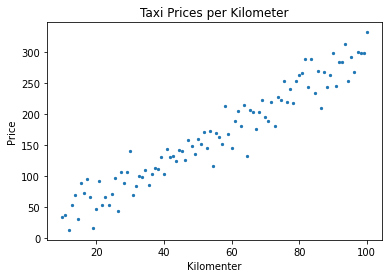

In [3]:
import matplotlib.pyplot as plt

# make the plot
plt.scatter(x,y, s=5)
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
plt.show()

In [4]:
m_array = np.linspace(2,4,50)

cost_list = []
for m in m_array:
    squared_residuals = (x * m - y)**2
    sum_of_squared_residuals = np.sum(squared_residuals, axis=0)
    cost = 1 / n * sum_of_squared_residuals
    cost_list.append(cost)

# find minimal cost index
index = np.argmin(cost_list)
# save the m with the lowest cost
m_best = m_array[index]

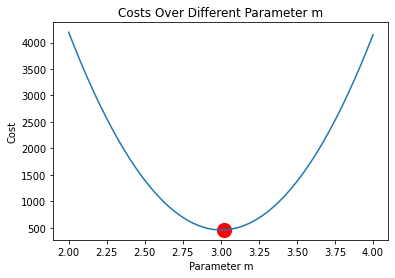

In [5]:
# Plot Cost over m's
plt.plot(m_array, cost_list)
# Plot minimal cost as a red dot
plt.scatter(m_best, cost_list[index],marker='o', c='red', s=200)
# axis naming
plt.ylabel('Cost')
plt.xlabel('Parameter m')
plt.title('Costs Over Different Parameter m')
plt.show()

Text(0.5, 1.0, 'Costs Over Different Parameter m')

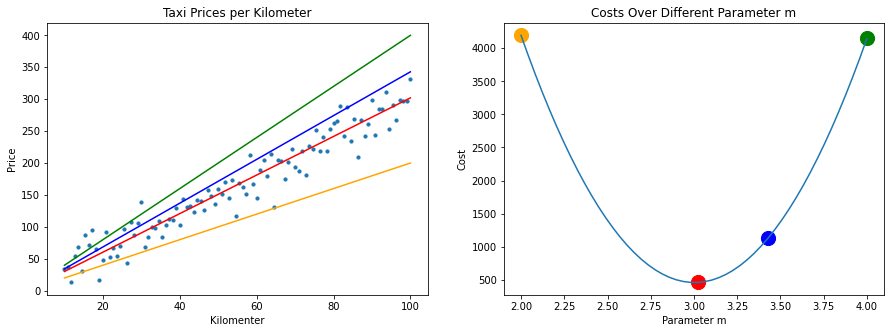

In [6]:
fig = plt.figure(figsize=(15,5)) 
ax = fig.add_subplot(121) 
ax.plot(x,x*m_best, c='red')
ax.plot(x,m_array[0]*x,c='orange')
ax.plot(x,m_array[-1]*x,c='green')
ax.plot(x,m_array[-15]*x,c='blue')
ax.scatter(x,y, s=10)
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
ax = fig.add_subplot(122)
ax.plot(m_array, cost_list)
ax.scatter(m_best, cost_list[index],marker='o', c='red', s=200)
ax.scatter(m_array[0], cost_list[0],marker='o', c='orange', s=200)
ax.scatter(m_array[-1], cost_list[-1],marker='o', c='green', s=200)
ax.scatter(m_array[-15], cost_list[-15],marker='o', c='blue', s=200)
plt.ylabel('Cost')
plt.xlabel('Parameter m')
plt.title('Costs Over Different Parameter m')

In [7]:
# predict value with linear regression
y_prediction = x * m_best

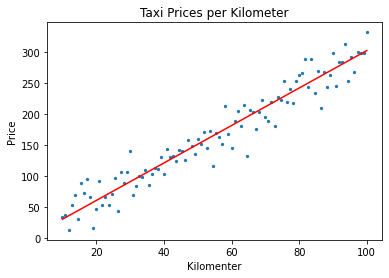

In [8]:
# make the plot
plt.scatter(x,y, s=5)
# plot the model
plt.plot(x,y_prediction, c='red')
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
plt.show()

## Iris Data

The iris dataset contains the following data
- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)

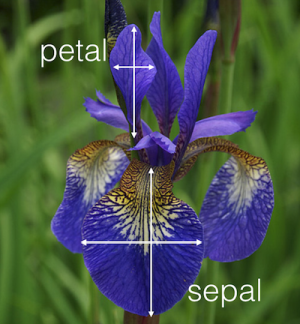

In [9]:
from IPython.display import Image
Image(filename='iris.png')

In [10]:
import pandas as pd
from sklearn.datasets import load_iris

dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
data['Species'] = dataset['target']
data['Species'] = data['Species'].apply(lambda x: dataset['target_names'][x])
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

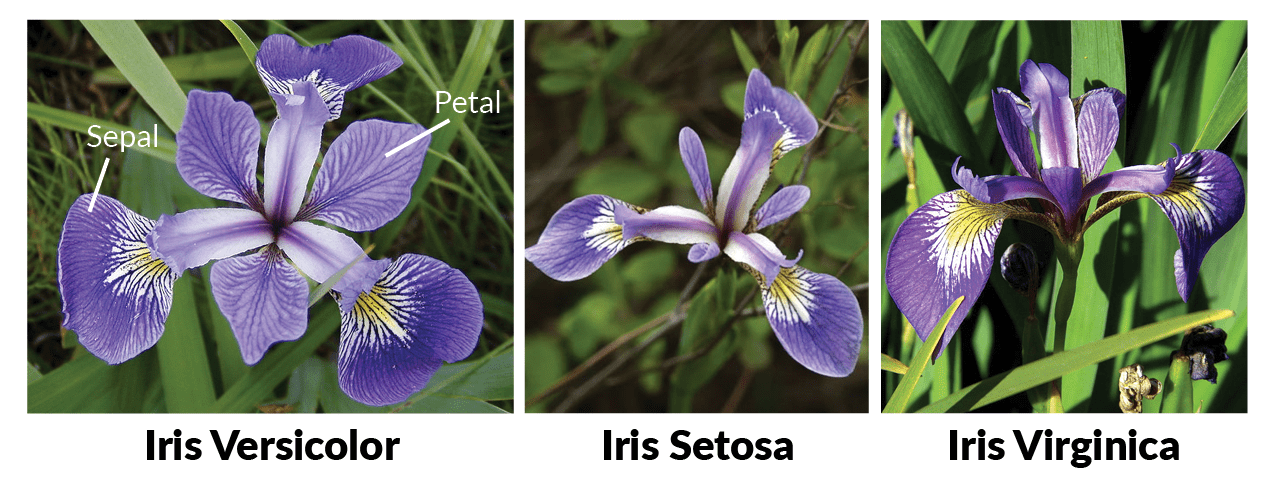

In [12]:
from IPython.display import Image
Image(filename='iris-all.png')

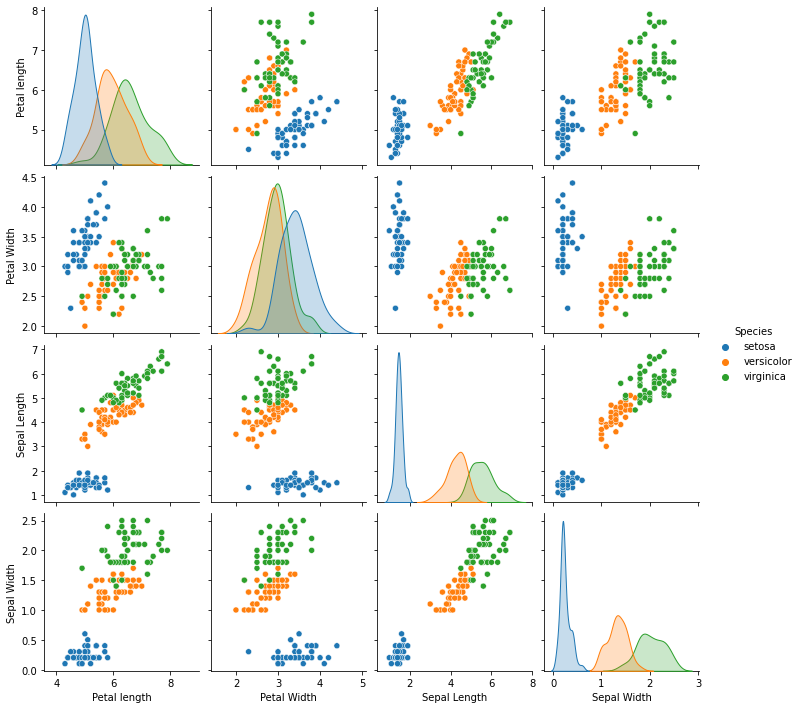

In [13]:
import seaborn as sns

sns.pairplot(data, hue="Species")

## Supervised Classification with Decision Tree

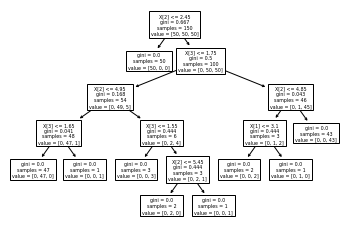

In [14]:
from sklearn import tree
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)
plt.show()

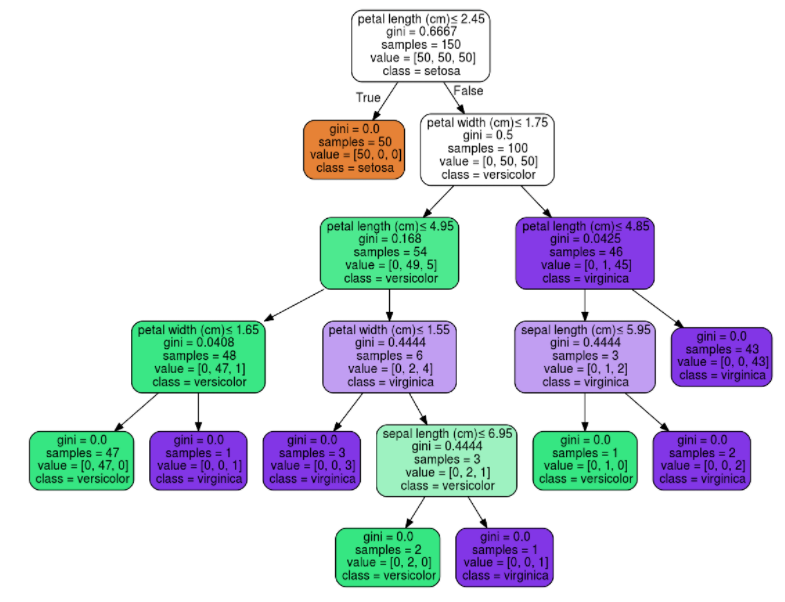

In [15]:
from IPython.display import Image
Image(filename='Tree.png')

## Unsupervised Dimensionality Reduction

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
X, y = load_iris(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mnist_pca = PCA(n_components=2)
pc = mnist_pca.fit_transform(X_scaled)
pc.shape

LinAlgError: SVD did not converge

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(pc[:,0],pc[:,1],c=y, s=30)
# axis naming
plt.title('Unsupervised Dimensionality Reduction, PCA')
plt.ylabel('Principle Component 1')
plt.xlabel('Principle Component 2')
plt.show()

## MNIST Dataset

In [19]:
from tensorflow.keras.datasets import mnist

# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


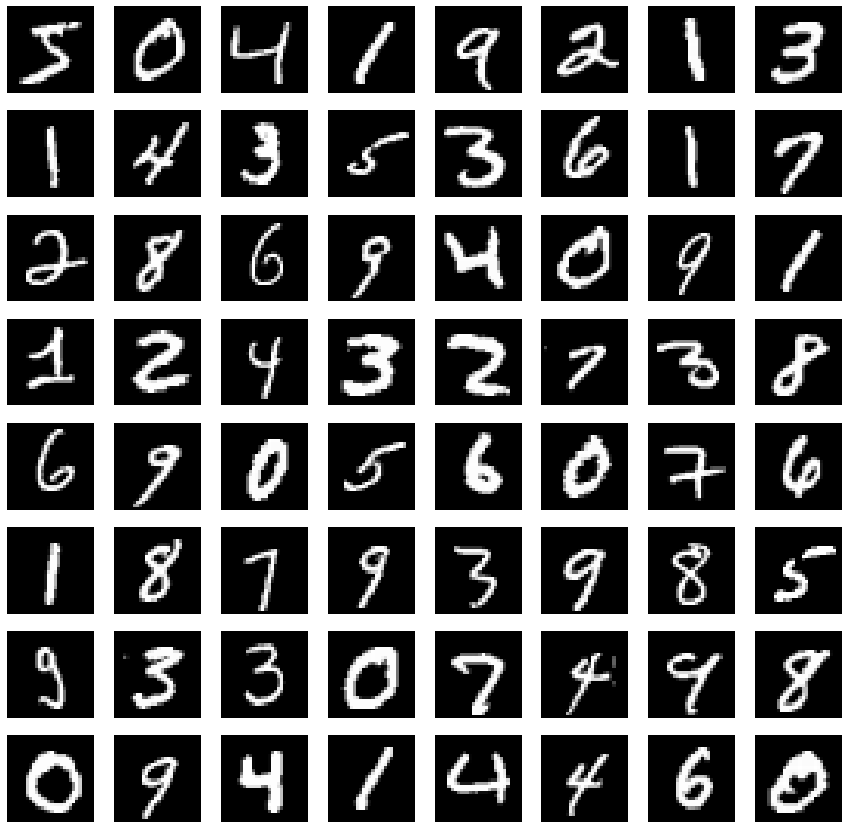

In [20]:
nrow = 8
ncol = 8
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(15)
fig.set_figwidth(15)
axs = _axs.flatten()
for i in range(nrow * ncol):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].axis('off')

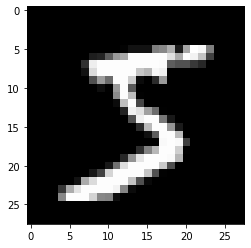

This picture is labelled as number:  5


In [27]:
# Plot the first image from the training data
plt.imshow(X_train[0], cmap='gray')
plt.show()
# Check if the number is correctly labled
print('This picture is labelled as number: ', y_train[0])

## Classification with Neural Network

In [65]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Preparing Data
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

n_classes = 10

Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a MLP
model = Sequential()
model.add(Dense(n_classes, input_shape=(784,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6778 - accuracy: 0.8321 - val_loss: 0.3841 - val_accuracy: 0.8990
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3628 - accuracy: 0.9020 - val_loss: 0.3179 - val_accuracy: 0.9131
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3200 - accuracy: 0.9112 - val_loss: 0.2955 - val_accuracy: 0.9183
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3000 - accuracy: 0.9169 - val_loss: 0.2852 - val_accuracy: 0.9207
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2880

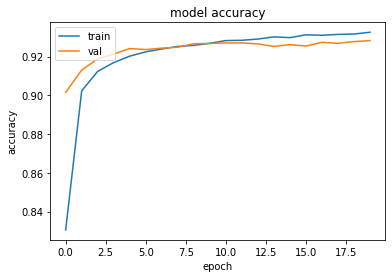

In [31]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()